# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration.py

# Funtions

In [236]:
def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= model_ols(y, x)
    result = zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [123]:
path_data_cart = 'datasets/data_cart.csv'

In [187]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

05/04/2019 to 19/06/2020
data: (300, 71)
pairs: (288, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [281]:
signal = pairs.loc[(pairs['Signal'] >= 0.95)].copy()
signal.reset_index(drop=True, inplace=True)
signal.shape

(20, 13)

In [282]:
signal = signal.loc[(signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
signal.reset_index(drop=True, inplace=True)
signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,AZUL4,BBSE3,0.000273,99,3.624776,5,0.239819,0.962281,1.066906,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,BRML3,LREN3,0.031377,95,0.416052,5,0.284764,0.968338,1.104593,Long/Short,5,"180,200,220,240,250"
2,250,IGTA3,LREN3,0.041554,95,1.087977,6,0.317774,0.968757,1.014962,Long/Short,8,"120,140,160,180,200,220,240,250"
3,250,LREN3,MULT3,0.042207,95,1.490895,6,0.312371,0.971070,1.066628,Short/Long,4,"200,220,240,250"
4,250,TOTS3,VIVT4,0.001505,99,3.548974,6,0.264931,0.809289,1.097816,Long/Short,6,"160,180,200,220,240,250"
5,250,IGTA3,USIM5,0.005809,99,4.306023,7,0.285019,0.939125,1.015629,Long/Short,8,"120,140,160,180,200,220,240,250"
6,250,BBDC3,SANB11,0.019923,95,0.736223,8,0.297370,0.987493,1.004259,Long/Short,4,"200,220,240,250"
7,250,CYRE3,MULT3,0.024929,95,1.223257,8,0.333200,0.958080,1.536720,Short/Long,6,"160,180,200,220,240,250"
8,250,HYPE3,TOTS3,0.024153,95,0.117477,8,0.274368,0.649508,1.160705,Short/Long,5,"180,200,220,240,250"
9,250,MULT3,USIM5,0.014515,95,2.449930,8,0.236869,0.921303,0.977390,Long/Short,8,"120,140,160,180,200,220,240,250"


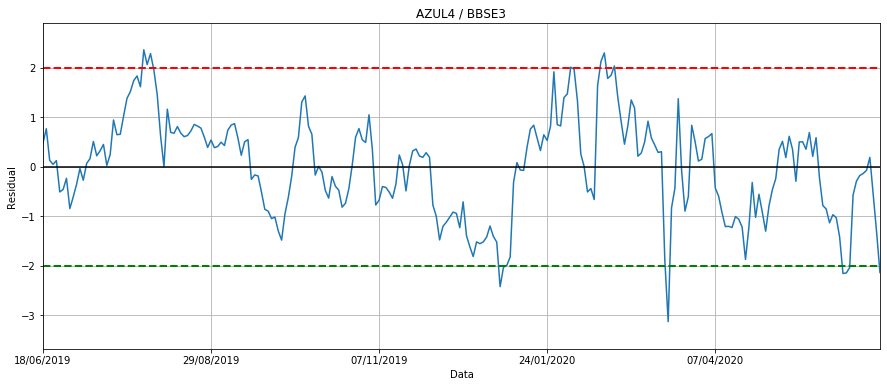

In [162]:
show(data, 'AZUL4', 'BBSE3')

### Plota todos os sinais

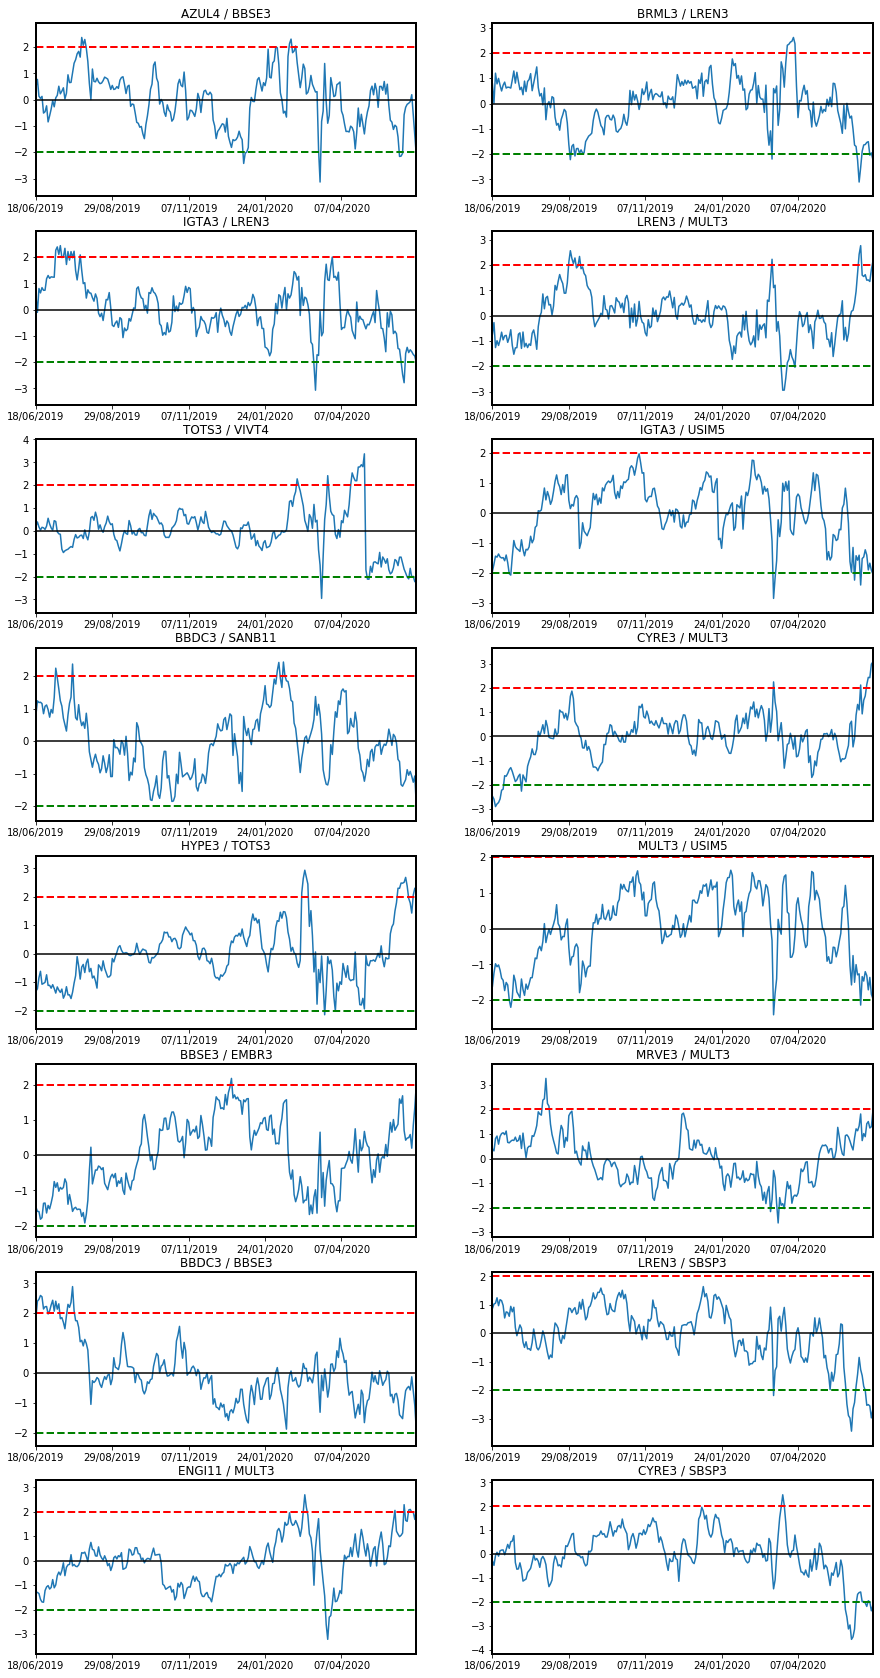

In [283]:
fig2, axes = plt.subplots(nrows=int((signal.shape[0]/2)), ncols=2, figsize=(15, 30))
for i, ax in enumerate(axes.flatten()):
    row = signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax)
    #plt.tight_layout()

Visualiza todos os gráficos de df signal

In [158]:
"""clear_folder('graphic')
for i, j in signal.iterrows():
    y_symbol = j['Dependente']
    x_symbol = j['Independente']
    
    show(data, y_symbol, x_symbol,padronizar=True, savefig='graphic/{}-{}.jpg'.format(y_symbol,x_symbol))"""

"clear_folder('graphic')\nfor i, j in signal.iterrows():\n    y_symbol = j['Dependente']\n    x_symbol = j['Independente']\n    \n    show(data, y_symbol, x_symbol,padronizar=True, savefig='graphic/{}-{}.jpg'.format(y_symbol,x_symbol))"

#### Verifica movimento do par nos últimos 8 dias

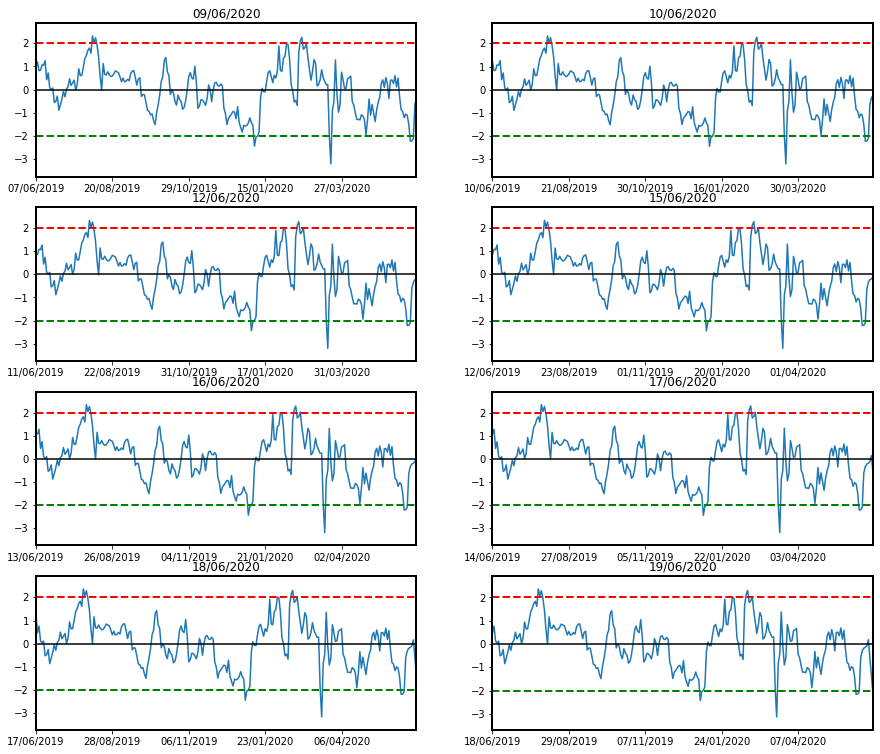

In [262]:
y_symbol = 'AZUL4'
x_symbol = 'BBSE3'

index = data.shape[0]-8
fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
for i, ax in enumerate(axes.flatten()):
    index+=1
    last_data = data.iloc[:index].copy()
    label = last_data.index[-1]
    subshow(last_data, y_symbol, x_symbol, ax, title=label)
    #plt.tight_layout()

In [276]:
test = data.iloc[data.shape[0]-8:][['AZUL4', 'BBSE3']]

In [277]:
test.to_excel("datasets/excel.xlsx")

In [285]:
y, x = getvalues_by_period(data['AZUL4'], data['BBSE3'], 250)
model= model_ols(y, x)
model.params

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const   -73.038805
BBSE3     3.624776
dtype: float64

In [292]:
model.resid.iloc[len(model.resid)-8:]

Data
09/06/2020   -1.297505
10/06/2020   -0.786427
12/06/2020   -0.607774
15/06/2020   -0.324039
16/06/2020    0.840916
17/06/2020   -2.536373
18/06/2020   -5.872460
19/06/2020   -9.518492
dtype: float64